In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import pyarrow as pa
import pyarrow.parquet as pq
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import functions as fc
import matplotlib.pyplot as plt
import csv


/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## getting the sensitivity:
$S=\frac{n_s}{B}$ with B = Background

with $n_s = \epsilon_{cut} \:BF \:L \:\sigma(e^+e^- \rightarrow b\overline b)$

BF : $\:\:$ branching fraction of $B \rightarrow K\nu \overline\nu$

$\epsilon_{cut} : \:\: $ signal efficiency at $PFOM_{max}$

L :$\:\:$ Integrated luminosity of Background

$\sigma(e^+e^- \rightarrow b\overline b)$ : cross section at $ \sqrt s = \Upsilon(4S) = 10.58\:$ GeV


Values:

BF = $2*0.514*4.6 \cdot 10^{-6}$ 

L = $\frac{100}{3}$ fb⁻¹ 

$ \sigma( \Upsilon(4S)) = (1.110 \pm 0.008)\cdot 10^{6}\:$ fb from The Belle II Physics Book

In [2]:
def sensitivity(pfom_max,B_events):

    bf = 2*0.514*4.6e-6
    sigma=1.11e6 #fb
    l=100/3 #fb⁻¹
    ns=bf*sigma*l*pfom_max
    print(f"Number of sensitivity events: {ns:.2}")
    return ns/B_events

## 4.6

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


---------------------------------------------------------------------
Sample: 0_large.parquet
Background pre cut : 139016278.0
Background post cut: 46570403
Number of sensitivity events: 0.016
Sensitivity: 3.45e-10 sigma
xgb value for PFOM_max: 0.0


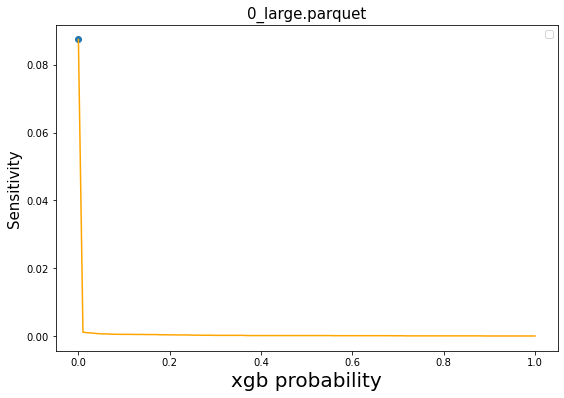

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


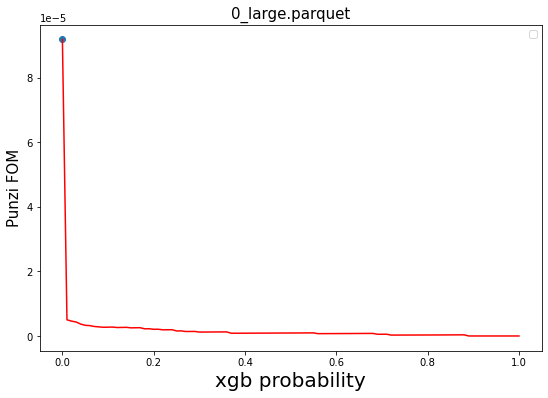

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


---------------------------------------------------------------------
Sample: 0_1_large.parquet
Background pre cut : 139016278.0
Background post cut: 46570476
Number of sensitivity events: 0.015
Sensitivity: 3.28e-10 sigma
xgb value for PFOM_max: 0.0


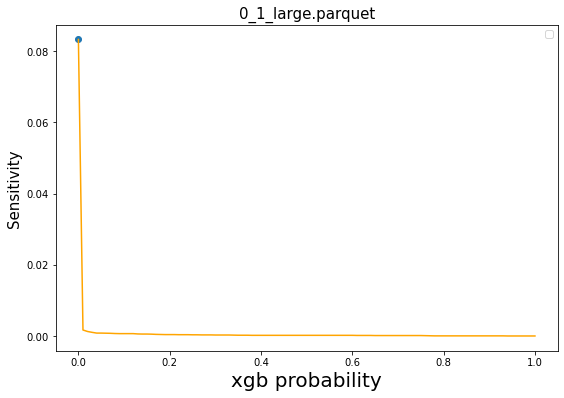

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


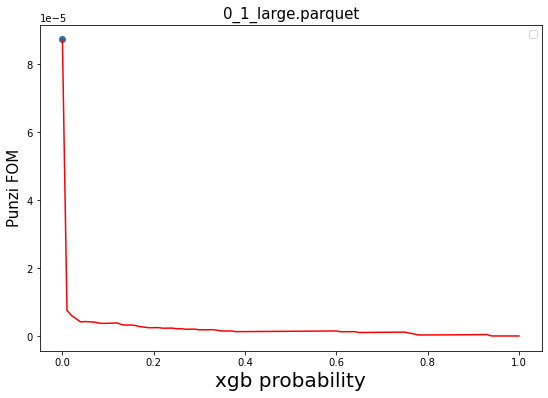

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


---------------------------------------------------------------------
Sample: 0_3_large.parquet
Background pre cut : 139016278.0
Background post cut: 46570384
Number of sensitivity events: 0.016
Sensitivity: 3.54e-10 sigma
xgb value for PFOM_max: 0.0


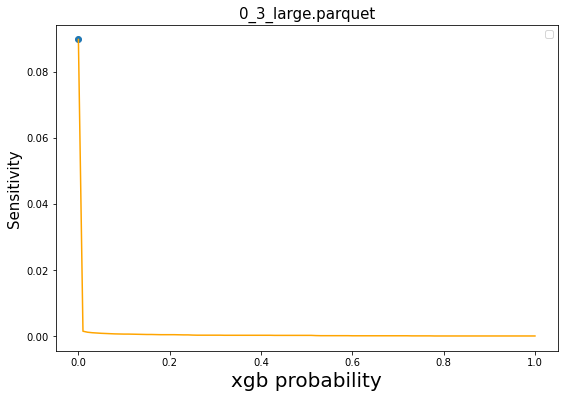

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


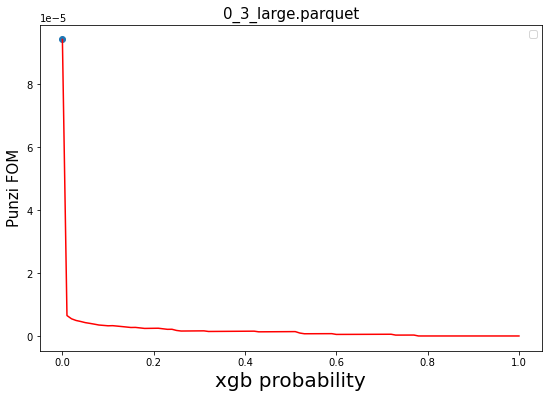

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


---------------------------------------------------------------------
Sample: 0_5_large.parquet
Background pre cut : 139016278.0
Background post cut: 46570433
Number of sensitivity events: 0.017
Sensitivity: 3.69e-10 sigma
xgb value for PFOM_max: 0.0


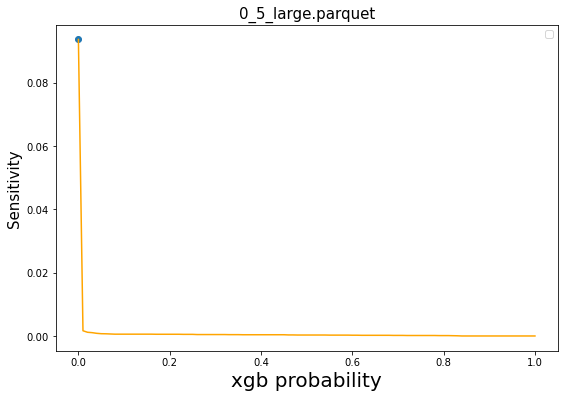

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


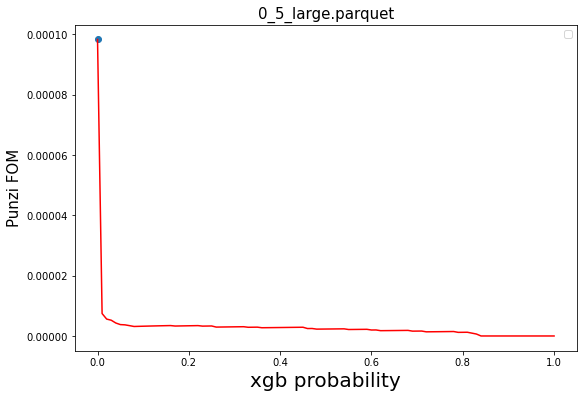

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


---------------------------------------------------------------------
Sample: 1_large.parquet
Background pre cut : 139016278.0
Background post cut: 46570476
Number of sensitivity events: 0.019
Sensitivity: 4.19e-10 sigma
xgb value for PFOM_max: 0.0


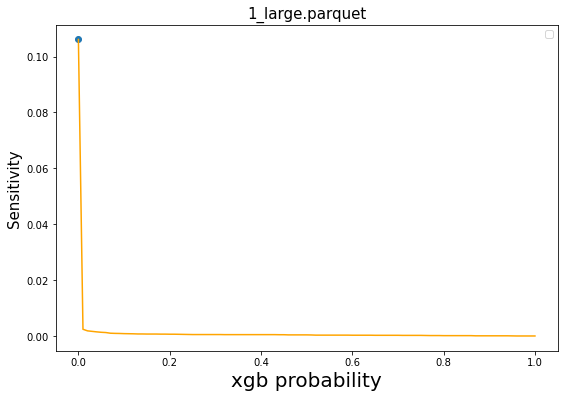

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


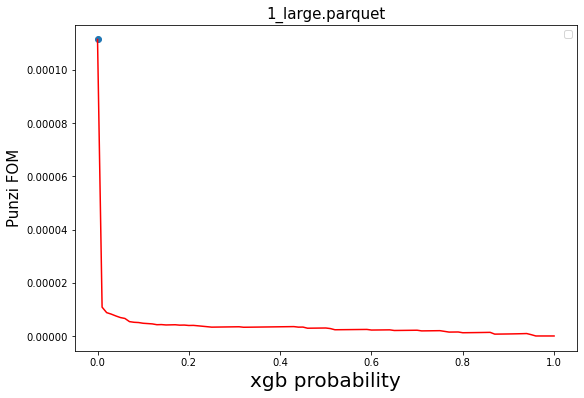

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


---------------------------------------------------------------------
Sample: 1_5_large.parquet
Background pre cut : 139016278.0
Background post cut: 46570459
Number of sensitivity events: 0.019
Sensitivity: 4.16e-10 sigma
xgb value for PFOM_max: 0.0


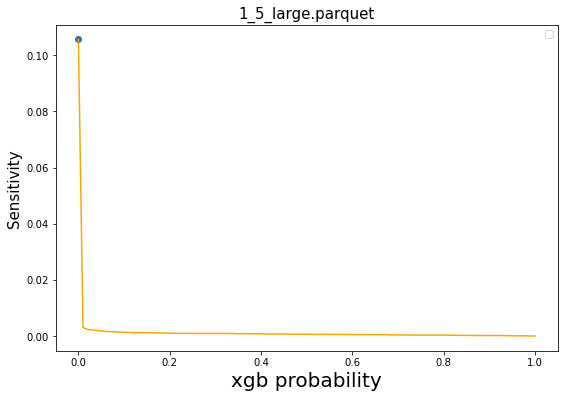

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


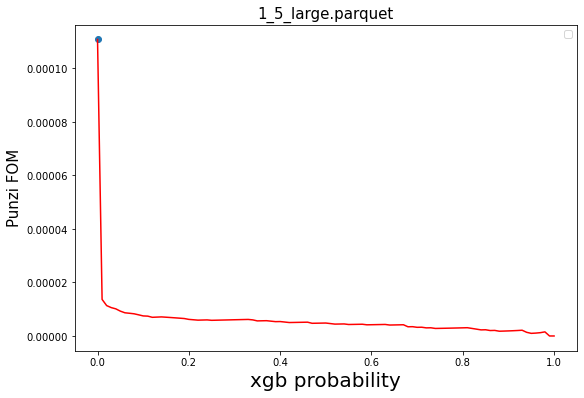

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


---------------------------------------------------------------------
Sample: 2_large.parquet
Background pre cut : 139016278.0
Background post cut: 46570513
Number of sensitivity events: 0.021
Sensitivity: 4.5e-10 sigma
xgb value for PFOM_max: 0.0


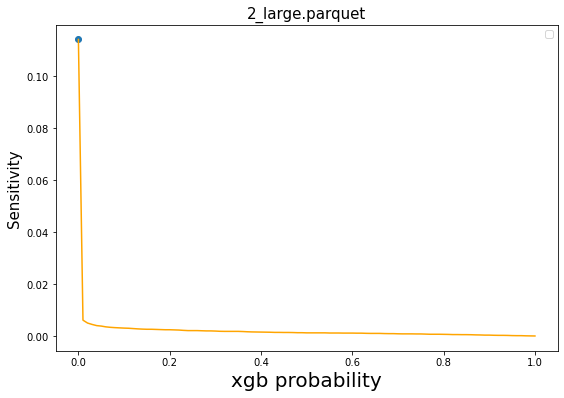

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


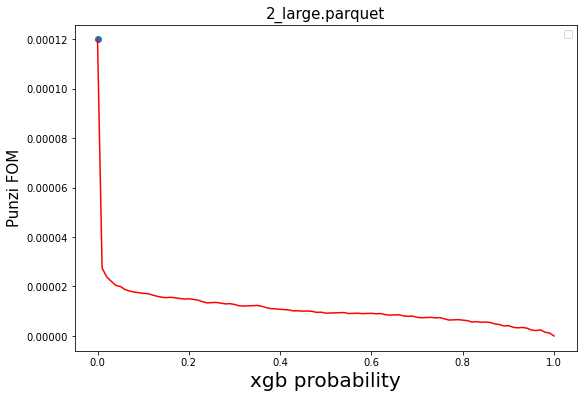

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


---------------------------------------------------------------------
Sample: 2_5_large.parquet
Background pre cut : 139016278.0
Background post cut: 46570474
Number of sensitivity events: 0.026
Sensitivity: 5.68e-10 sigma
xgb value for PFOM_max: 0.0


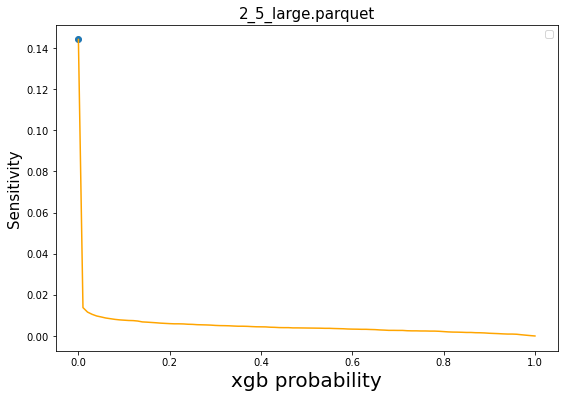

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


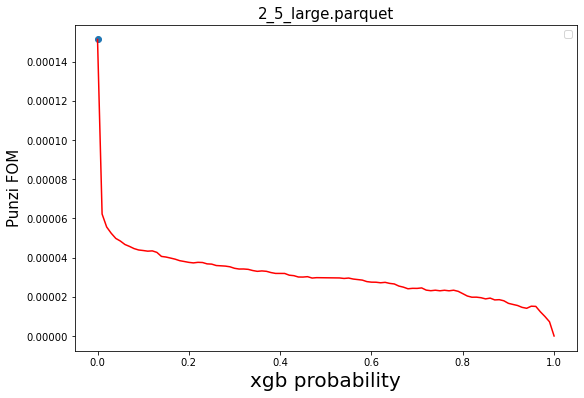

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


---------------------------------------------------------------------
Sample: 3_large.parquet
Background pre cut : 139016278.0
Background post cut: 46570453
Number of sensitivity events: 0.037
Sensitivity: 7.95e-10 sigma
xgb value for PFOM_max: 0.0


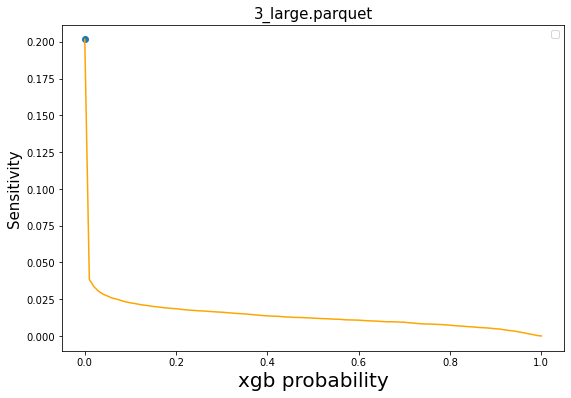

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


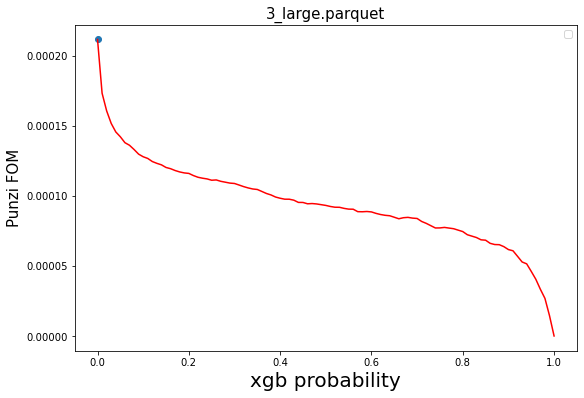

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


---------------------------------------------------------------------
Sample: 3_5_large.parquet
Background pre cut : 139016278.0
Background post cut: 2481293
Number of sensitivity events: 0.091
Sensitivity: 3.68e-08 sigma
xgb value for PFOM_max: 0.01


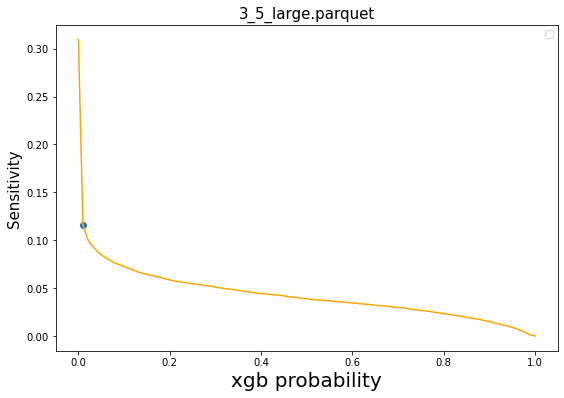

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


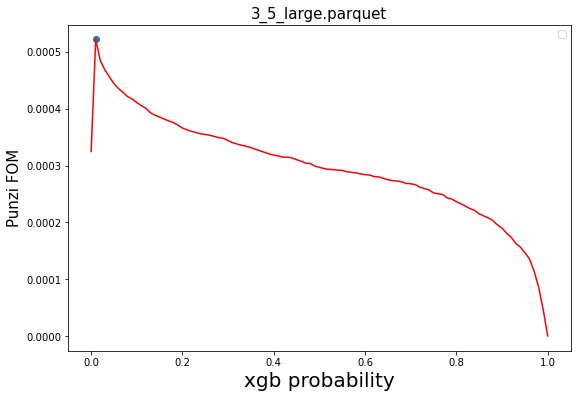

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


---------------------------------------------------------------------
Sample: 4_0_large.parquet
Background pre cut : 139016278.0
Background post cut: 2479357
Number of sensitivity events: 0.21
Sensitivity: 8.48e-08 sigma
xgb value for PFOM_max: 0.01


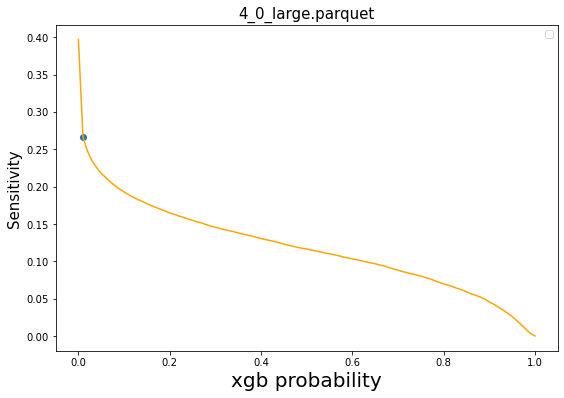

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


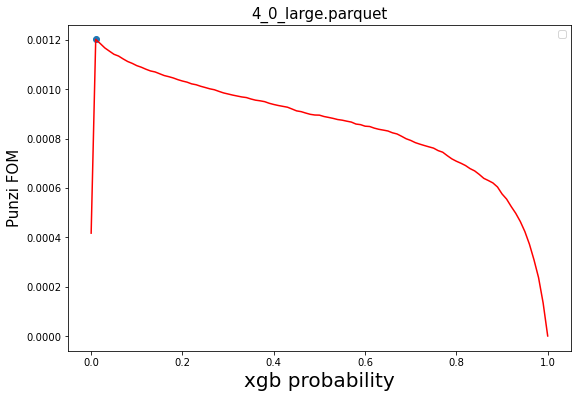

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


---------------------------------------------------------------------
Sample: 4_2_large.parquet
Background pre cut : 139016278.0
Background post cut: 1916947
Number of sensitivity events: 0.25
Sensitivity: 1.29e-07 sigma
xgb value for PFOM_max: 0.04


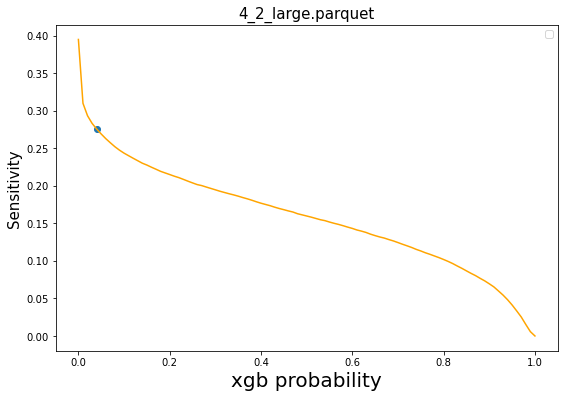

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


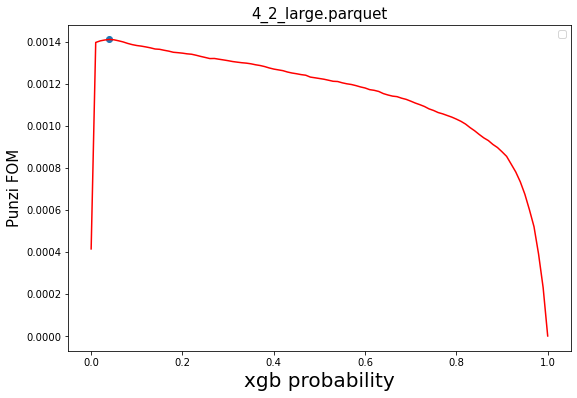

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


---------------------------------------------------------------------
Sample: 4_4_large.parquet
Background pre cut : 139016278.0
Background post cut: 1083817
Number of sensitivity events: 0.27
Sensitivity: 2.49e-07 sigma
xgb value for PFOM_max: 0.31


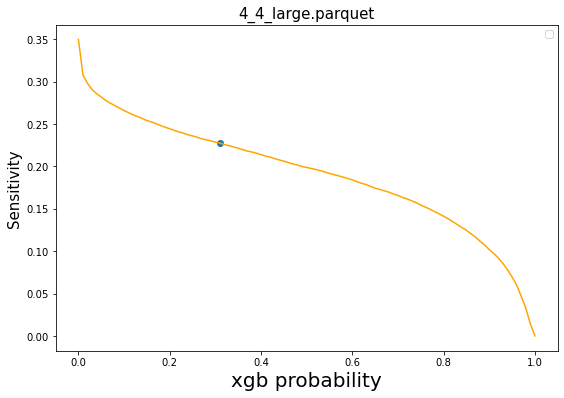

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


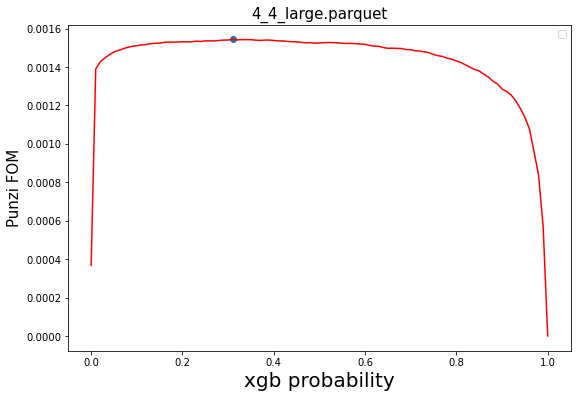

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


---------------------------------------------------------------------
Sample: 4_5_large.parquet
Background pre cut : 139016278.0
Background post cut: 761179
Number of sensitivity events: 0.27
Sensitivity: 3.53e-07 sigma
xgb value for PFOM_max: 0.5700000000000001


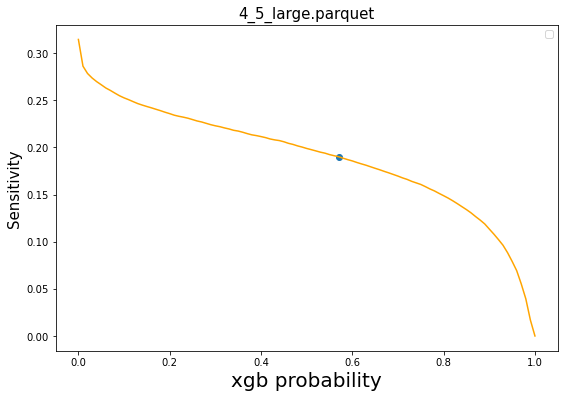

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


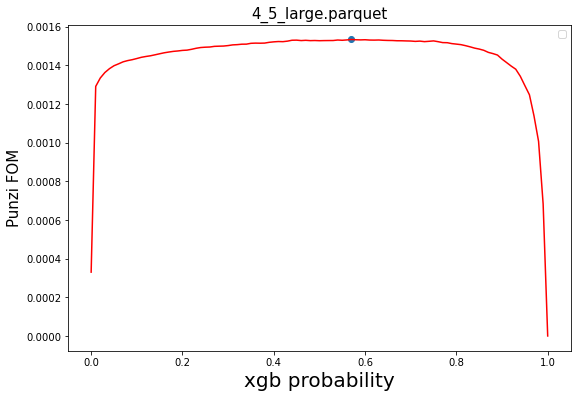

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


---------------------------------------------------------------------
Sample: 4_6_large.parquet
Background pre cut : 139016278.0
Background post cut: 109620
Number of sensitivity events: 0.4
Sensitivity: 3.63e-06 sigma
xgb value for PFOM_max: 0.97


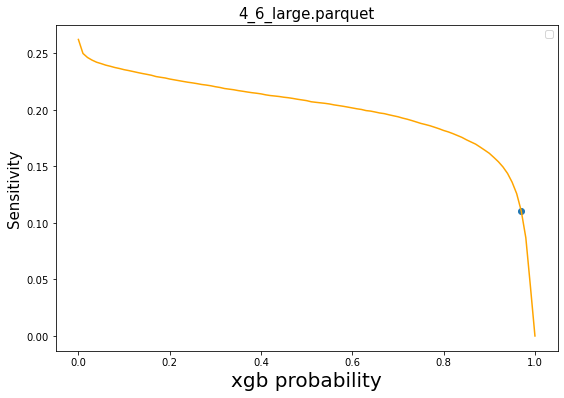

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


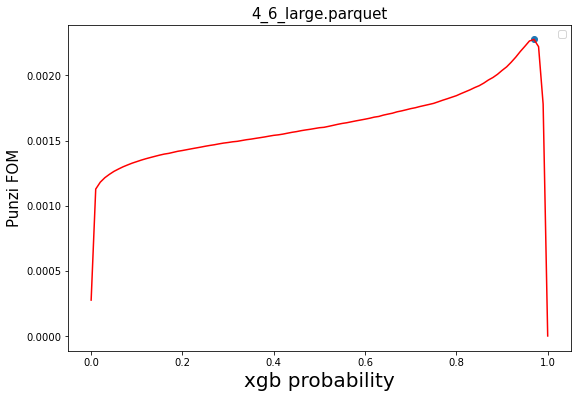

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


---------------------------------------------------------------------
Sample: 4_61_large.parquet
Background pre cut : 139016278.0
Background post cut: 505462
Number of sensitivity events: 0.25
Sensitivity: 4.85e-07 sigma
xgb value for PFOM_max: 0.78


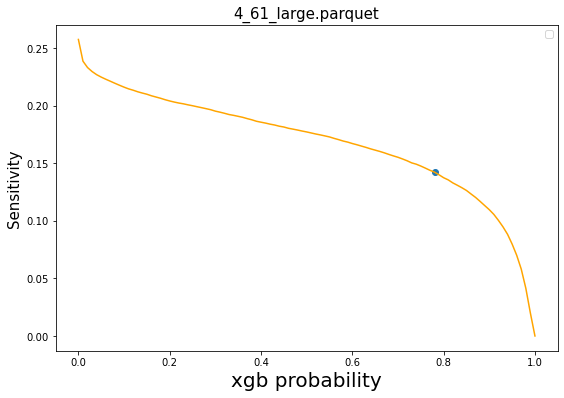

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


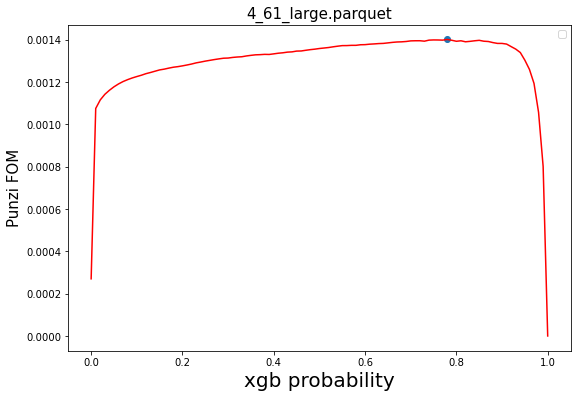

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


---------------------------------------------------------------------
Sample: 4_62_large.parquet
Background pre cut : 139016278.0
Background post cut: 462634
Number of sensitivity events: 0.24
Sensitivity: 5.21e-07 sigma
xgb value for PFOM_max: 0.81


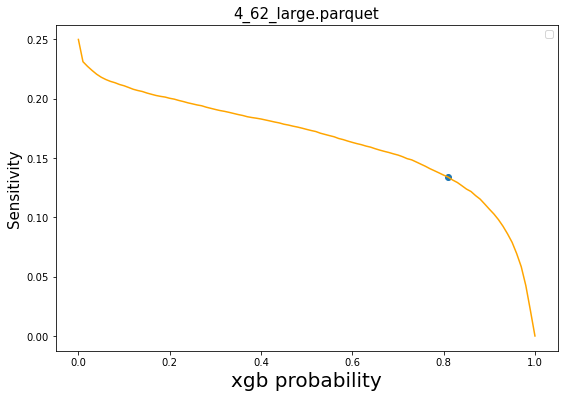

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


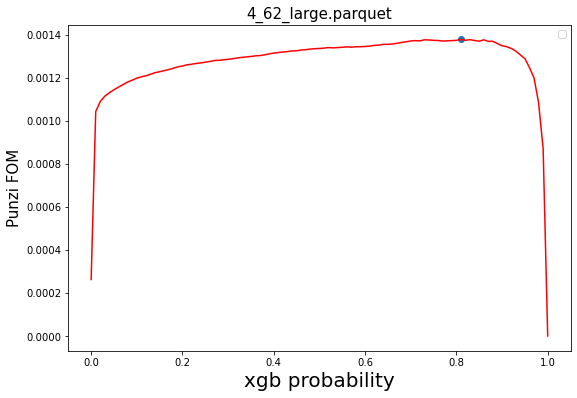

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


---------------------------------------------------------------------
Sample: 4_63_large.parquet
Background pre cut : 139016278.0
Background post cut: 461909
Number of sensitivity events: 0.23
Sensitivity: 5.07e-07 sigma
xgb value for PFOM_max: 0.81


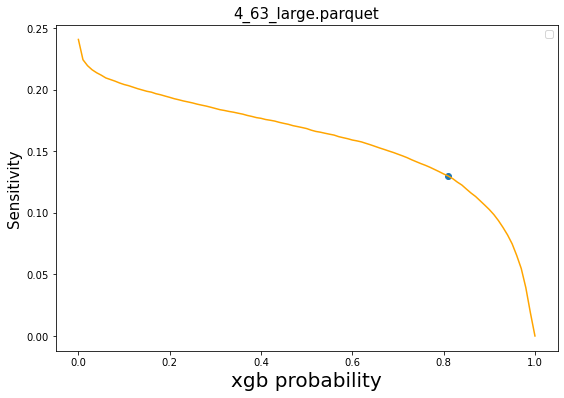

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


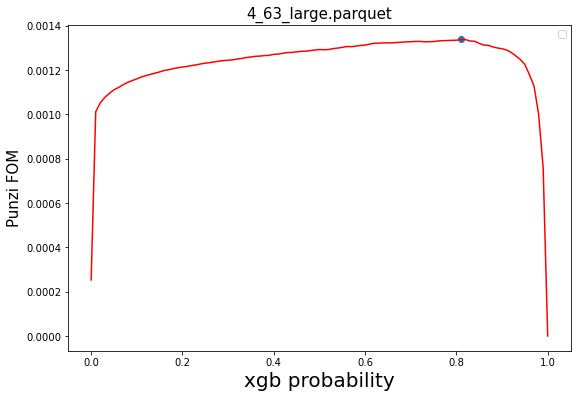

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


---------------------------------------------------------------------
Sample: 4_64_large.parquet
Background pre cut : 139016278.0
Background post cut: 477055
Number of sensitivity events: 0.23
Sensitivity: 4.79e-07 sigma
xgb value for PFOM_max: 0.8


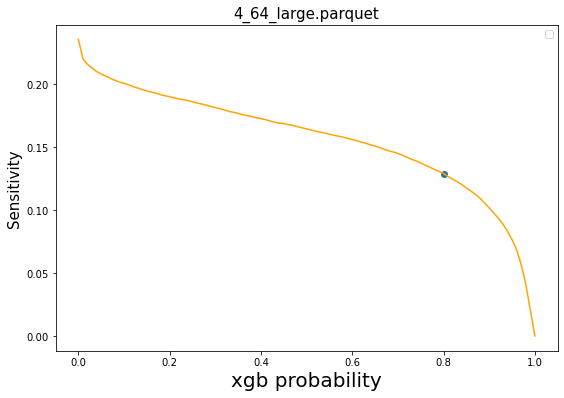

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


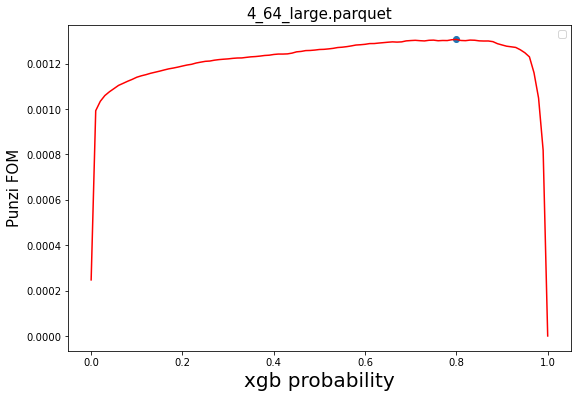

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


---------------------------------------------------------------------
Sample: 4_65_large.parquet
Background pre cut : 139016278.0
Background post cut: 474762
Number of sensitivity events: 0.22
Sensitivity: 4.72e-07 sigma
xgb value for PFOM_max: 0.8


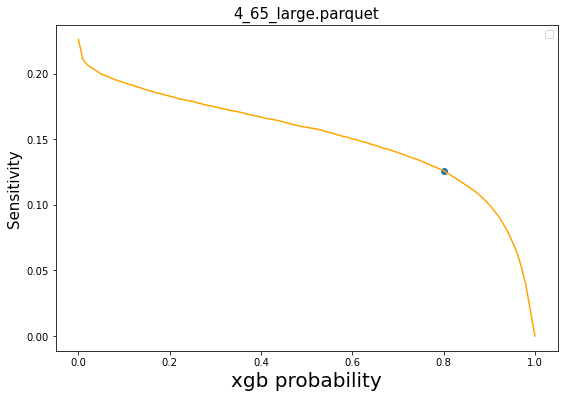

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


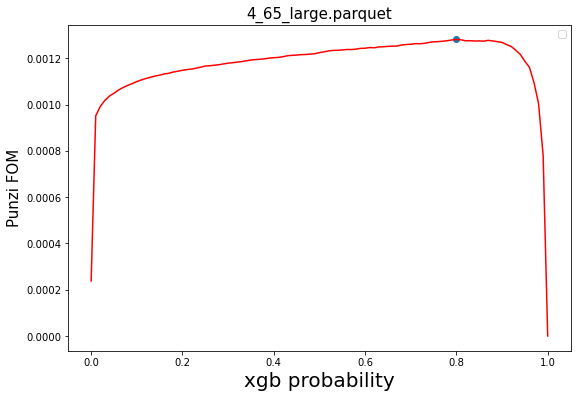

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


---------------------------------------------------------------------
Sample: 4_7_large.parquet
Background pre cut : 139016278.0
Background post cut: 380637
Number of sensitivity events: 0.17
Sensitivity: 4.48e-07 sigma
xgb value for PFOM_max: 0.86


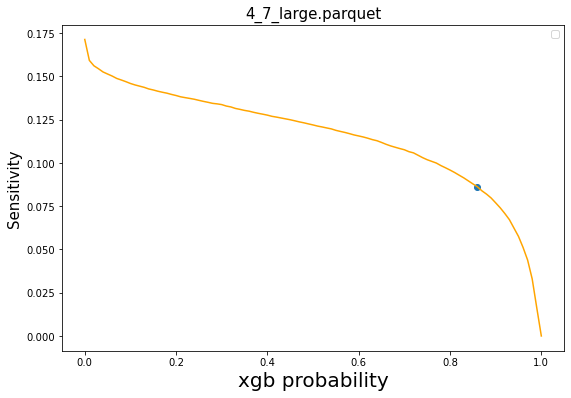

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


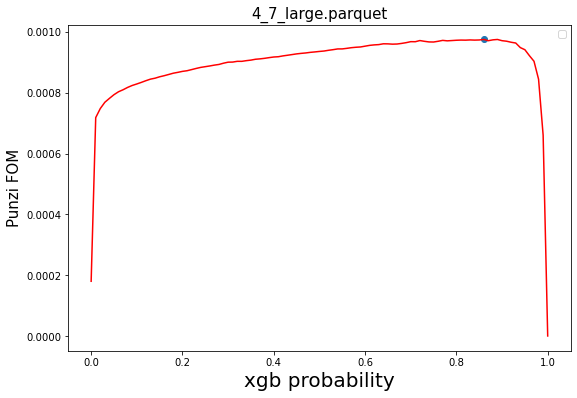

In [3]:
data = ["0_large.parquet","0_1_large.parquet","0_3_large.parquet","0_5_large.parquet","1_large.parquet","1_5_large.parquet","2_large.parquet","2_5_large.parquet","3_large.parquet","3_5_large.parquet",
        "4_0_large.parquet","4_2_large.parquet","4_4_large.parquet","4_5_large.parquet","4_6_large.parquet","4_61_large.parquet","4_62_large.parquet","4_63_large.parquet","4_64_large.parquet","4_65_large.parquet","4_7_large.parquet",]


S_list = []
maximum = []
eff = []
bkg = []
xgb_index = []

clf = XGBClassifier()
clf.load_model(f"/ceph/aavocone/PFOM_models/new_4_6_model500.txt")

for index,samples in enumerate(data):
        df = pq.read_table(f"/ceph/aavocone/Datasets/{samples}")
        df = df.to_pandas()

        X = df[df.columns[:-1]]    #exclude "signal" "classification" "B_sig_isSignalAcceptMissingNeutrino"
        y = df["signal"]   
        xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
        xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5)
        yprob = clf.predict_proba(xtrain)[:,1]
        sh,bh,s,b,bin_edges = fc.efficiency(yprob,ytrain)
        pfom = fc.PFOM(s,b,bh,5)
        max_index = np.where(pfom==max(pfom))[0][0]
        b_max = bh >= max_index/100
        b_max = b_max[b_max!=0]
        print("---------------------------------------------------------------------")
        print("Sample:", samples)
        print("Background pre cut :", len(y)-sum(y))
        print("Background post cut:", len(b_max))
        max_value = pfom[max_index]
        maximum.append(max_value)
        S = sensitivity(pfom[max_index],len(b_max))
        S_list.append(S)
        print(f"Sensitivity: {S:.3} sigma")
        eff.append(s[max_index])
        bkg.append(len(b_max))
        xgb_index.append(max_index/100)

       
        print("xgb value for PFOM_max:",bin_edges[max_index])
        plt.figure(figsize=(9,6))
        plt.scatter(bin_edges[max_index],s[max_index])
        plt.plot(bin_edges, s, color ="orange")
        plt.title(f"{samples}",fontsize=15)
        plt.ylabel("Sensitivity",fontsize=15)
        plt.xlabel("xgb probability", fontsize = 20)
        plt.legend()
        plt.show()

        plt.figure(figsize=(9,6))
        plt.scatter(bin_edges[max_index],pfom[max_index])
        plt.plot(bin_edges, pfom, color ="red")
        plt.title(f"{samples}",fontsize=15)
        plt.ylabel("Punzi FOM",fontsize=15)
        plt.xlabel("xgb probability", fontsize = 20)
        plt.legend()
        plt.show()


In [4]:

with open("46.csv","w",newline="") as f:
        f.truncate()
        writer = csv.writer(f)
        writer.writerow(S_list)
        writer.writerow(maximum)
        writer.writerow(eff)
        writer.writerow(bkg)
        writer.writerow(xgb_index)
        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


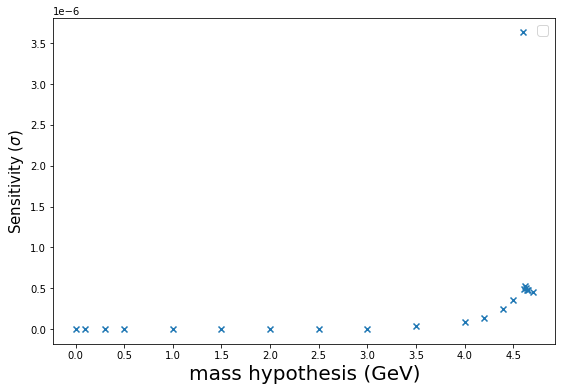

In [7]:
values = [0.005, 0.1, 0.3, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.2, 4.4, 4.5, 4.6, 4.61, 4.62, 4.63, 4.64, 4.65, 4.7]

plt.figure(figsize=(9,6))
plt.scatter(values, S_list, marker = "x")
plt.ylabel("Sensitivity ($\sigma$)",fontsize=15)
plt.xlabel("mass hypothesis (GeV)", fontsize = 20)
plt.xticks(np.arange(0,4.7,0.5))
plt.legend(fontsize=14)
plt.savefig(f"/work/aavocone/week14/pfom/Sensitivity_4_6_model.pdf", format="pdf",bbox_inches="tight")
plt.show()

In [ ]:
for i in S_list:
    print(i)

3.943239062706659e-09
3.944604721270472e-09
3.940882672914175e-09
3.9435566077097755e-09
3.942022579562791e-09
3.9446804514887884e-09
3.943998951144166e-09
3.942054710521089e-09
3.943664833666006e-09
1.1614666190710578e-07
2.1427988580201592e-07
3.244622303952176e-07
7.468536670548956e-07
1.2604894539522624e-06
1.3683625228655923e-05
1.741405557134764e-06
1.6776894031543455e-06
2.142234643113794e-06
1.994606748963706e-06
2.5979054104159483e-06
3.586060773075536e-06


## 0.005

/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of sensitivity events: 0.17
xgb value for PFOM_max: 0.98


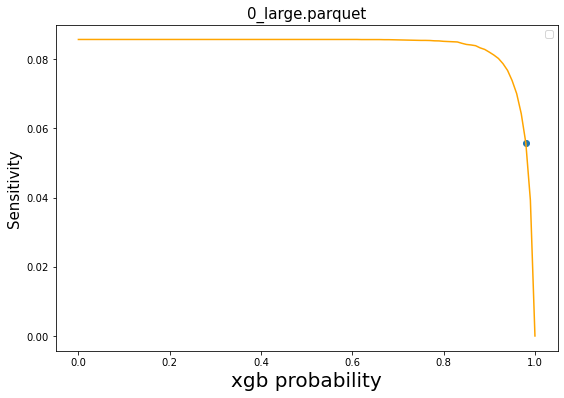

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


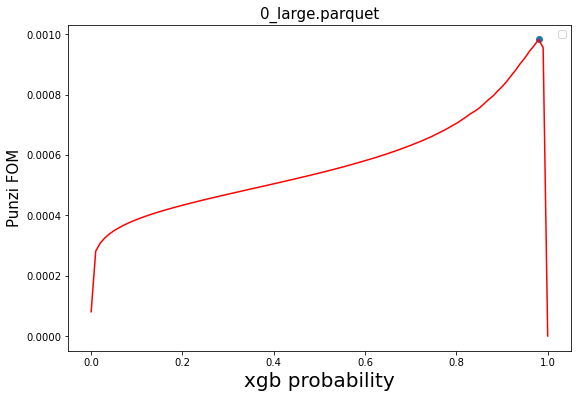

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of sensitivity events: 0.12
xgb value for PFOM_max: 0.98


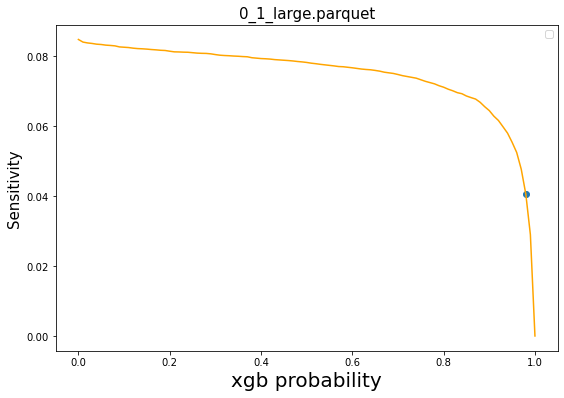

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


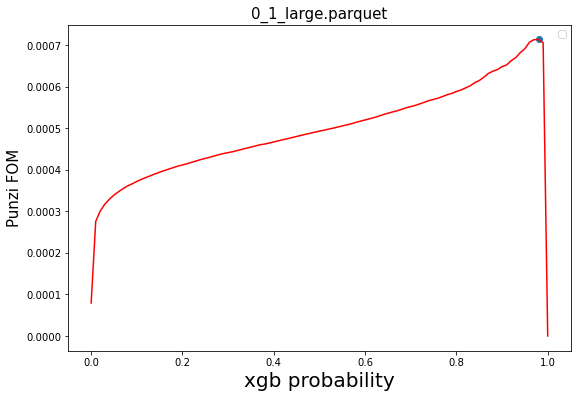

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of sensitivity events: 0.12
xgb value for PFOM_max: 0.98


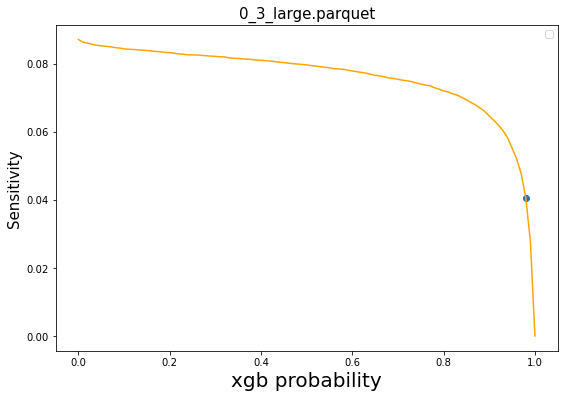

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


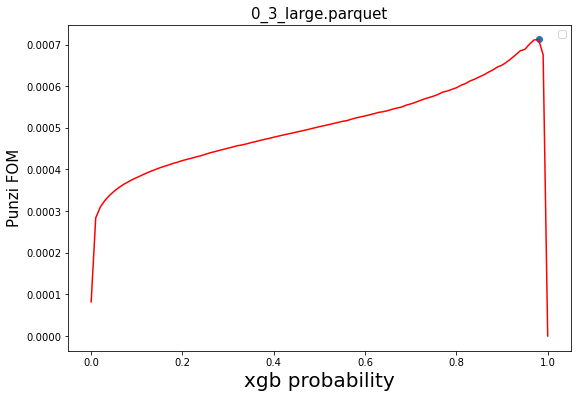

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of sensitivity events: 0.14
xgb value for PFOM_max: 0.98


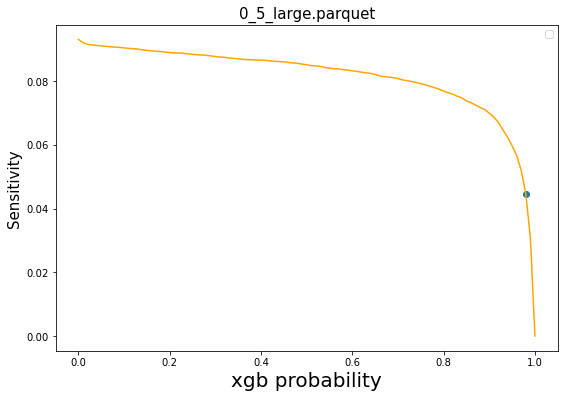

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


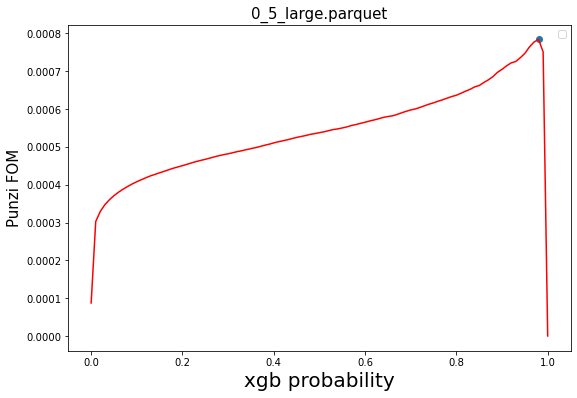

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of sensitivity events: 0.14
xgb value for PFOM_max: 0.96


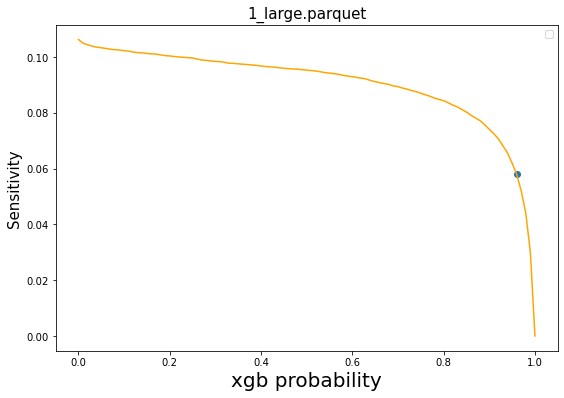

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


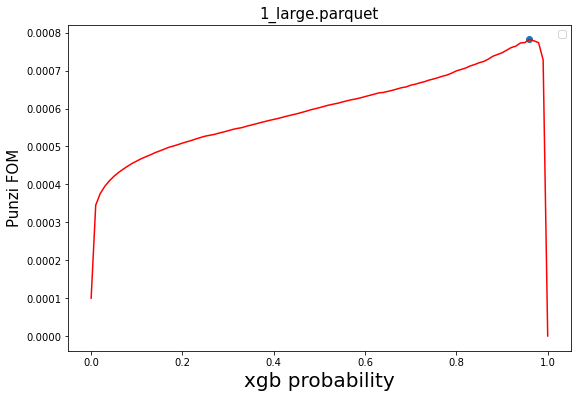

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of sensitivity events: 0.11
xgb value for PFOM_max: 0.91


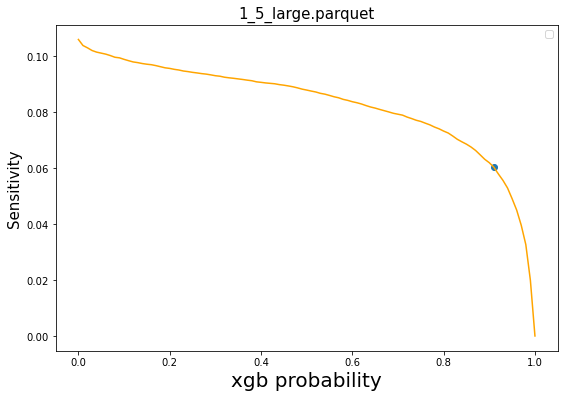

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


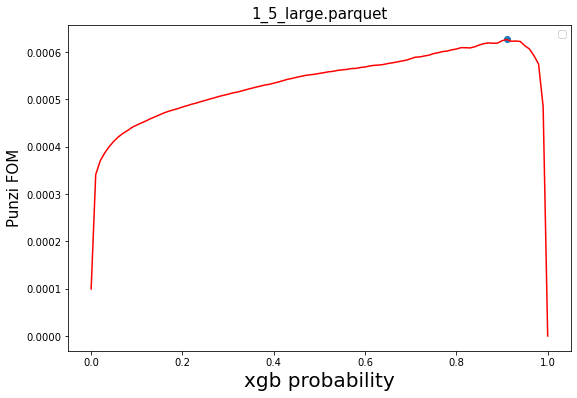

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of sensitivity events: 0.086
xgb value for PFOM_max: 0.74


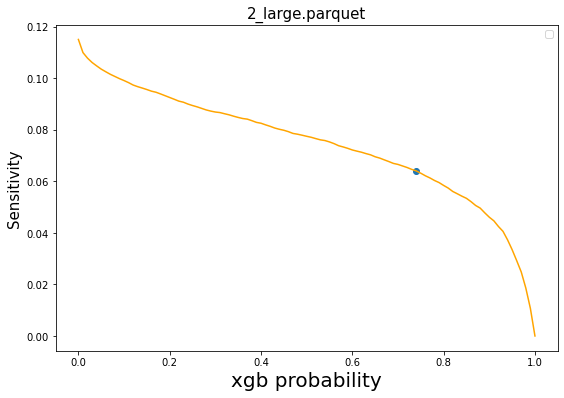

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


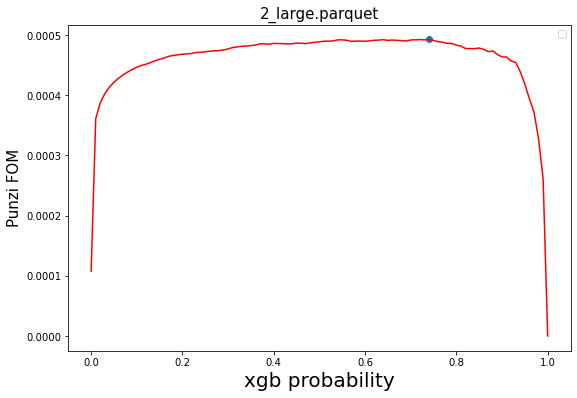

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of sensitivity events: 0.075
xgb value for PFOM_max: 0.08


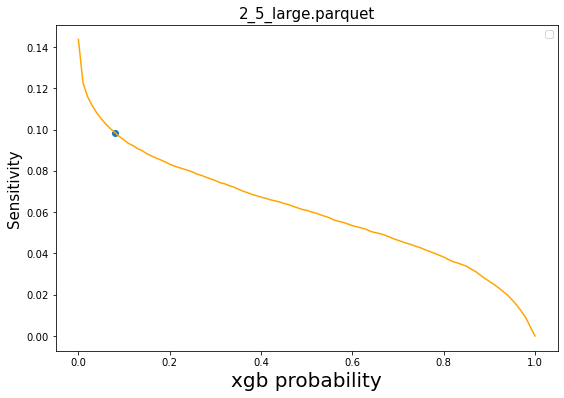

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


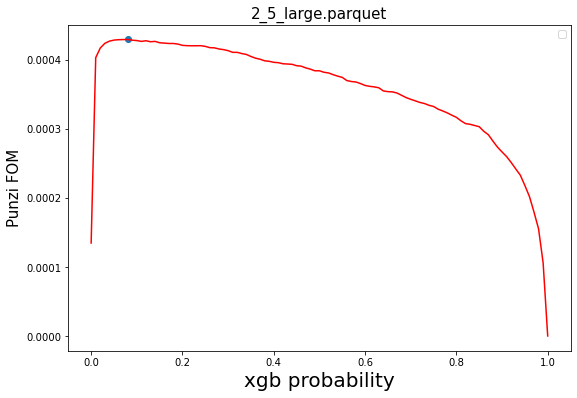

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of sensitivity events: 0.062
xgb value for PFOM_max: 0.01


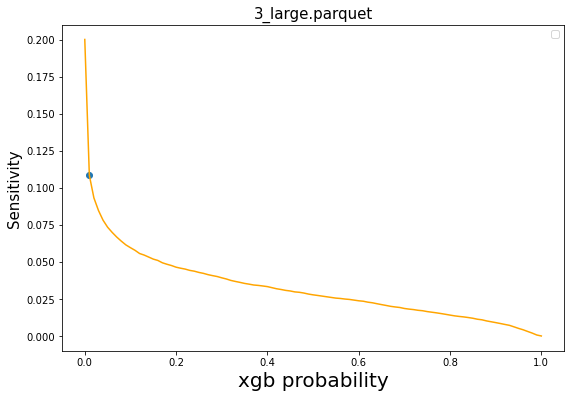

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


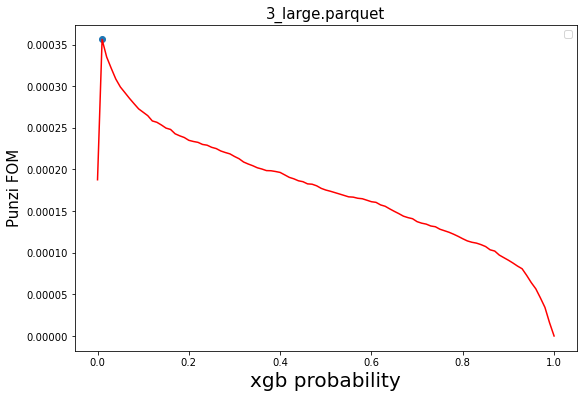

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of sensitivity events: 0.05
xgb value for PFOM_max: 0.0


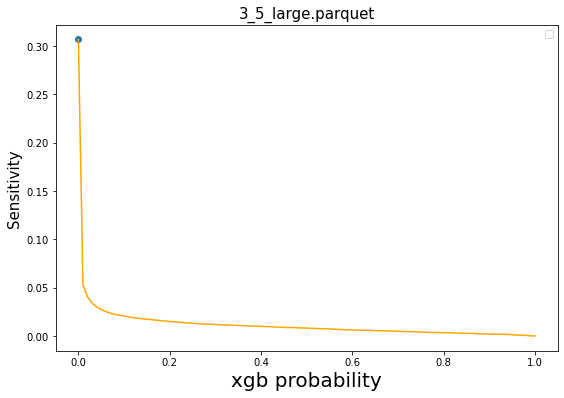

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


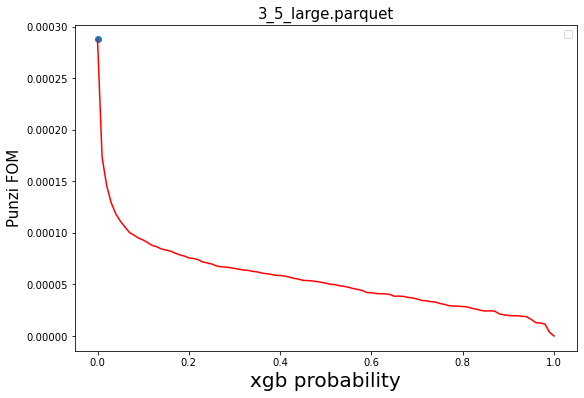

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of sensitivity events: 0.065
xgb value for PFOM_max: 0.0


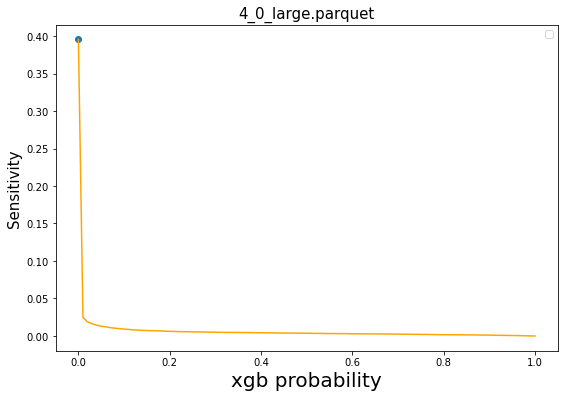

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


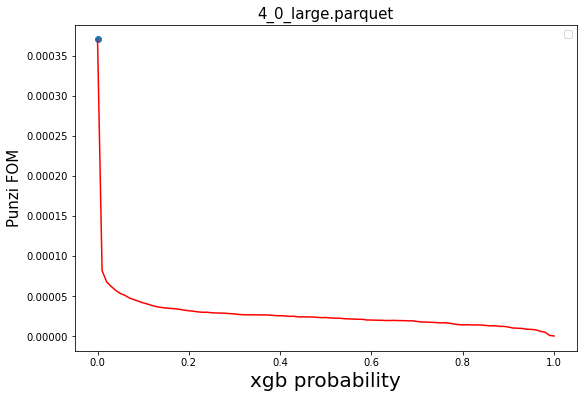

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of sensitivity events: 0.064
xgb value for PFOM_max: 0.0


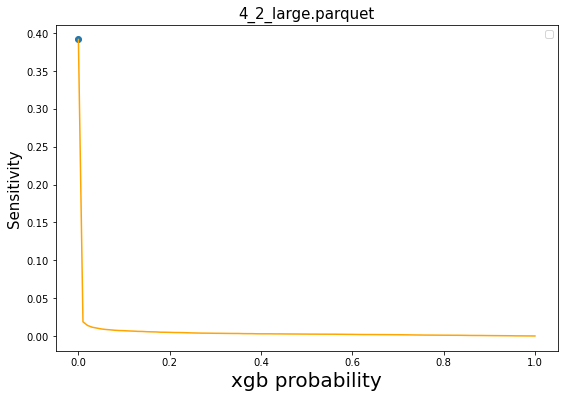

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


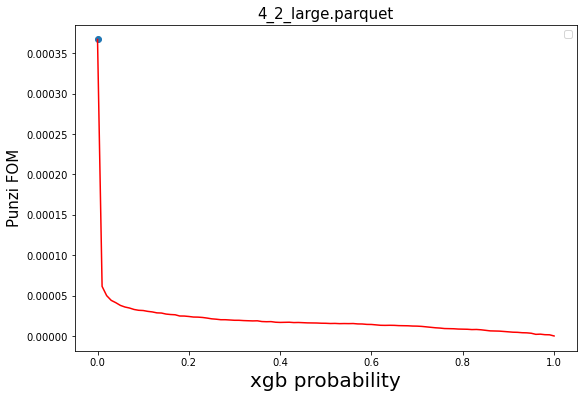

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of sensitivity events: 0.058
xgb value for PFOM_max: 0.0


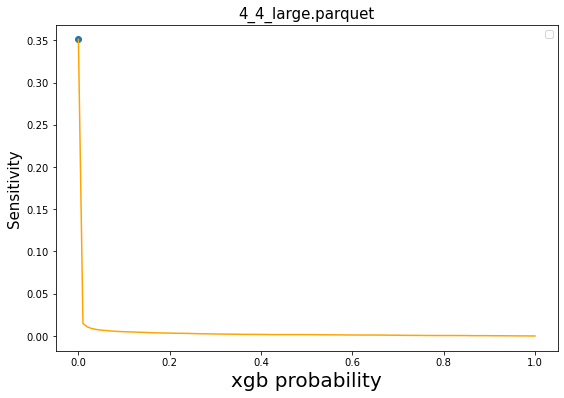

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


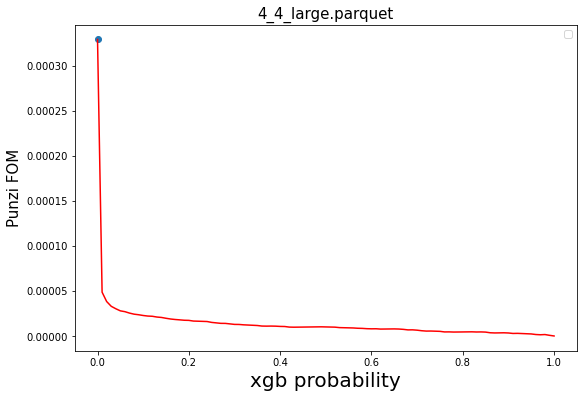

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of sensitivity events: 0.052
xgb value for PFOM_max: 0.0


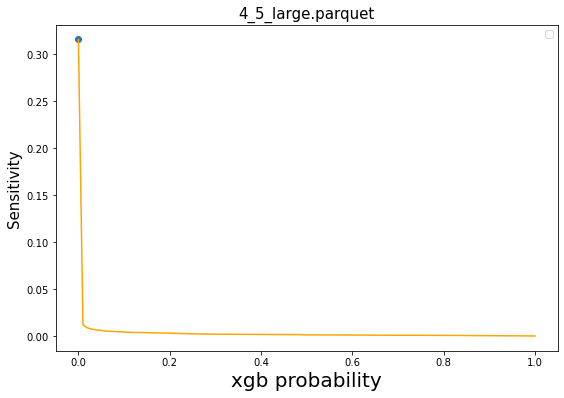

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


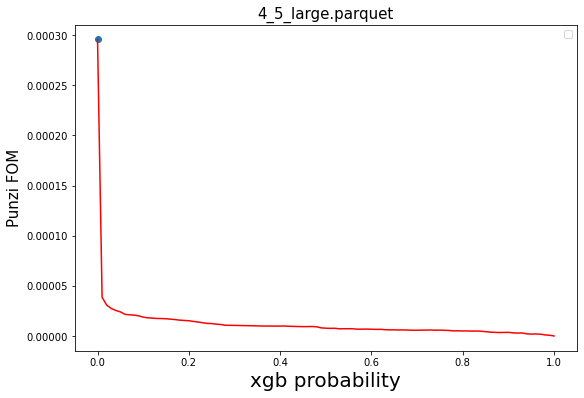

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of sensitivity events: 0.043
xgb value for PFOM_max: 0.0


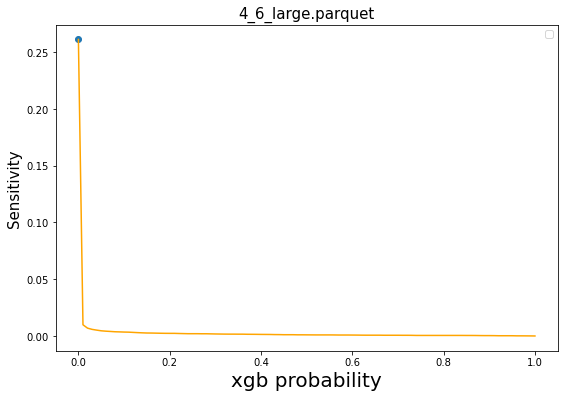

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


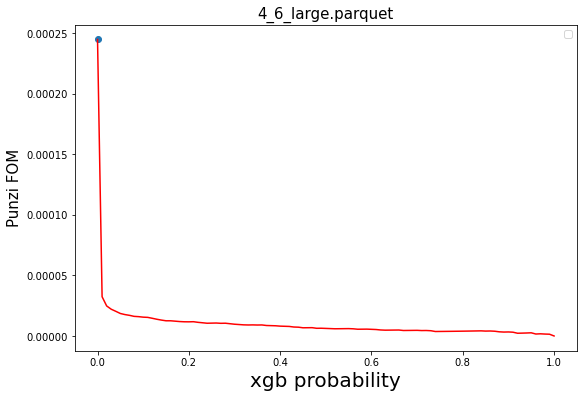

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of sensitivity events: 0.042
xgb value for PFOM_max: 0.0


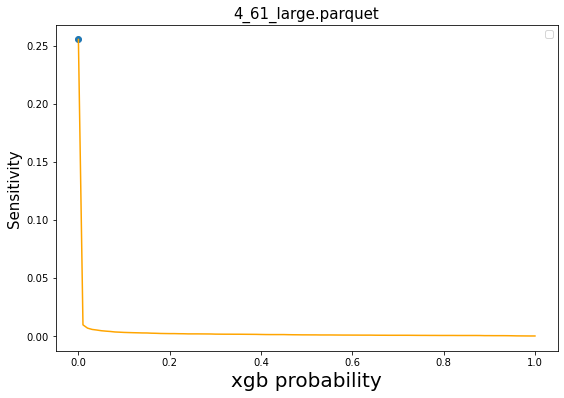

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


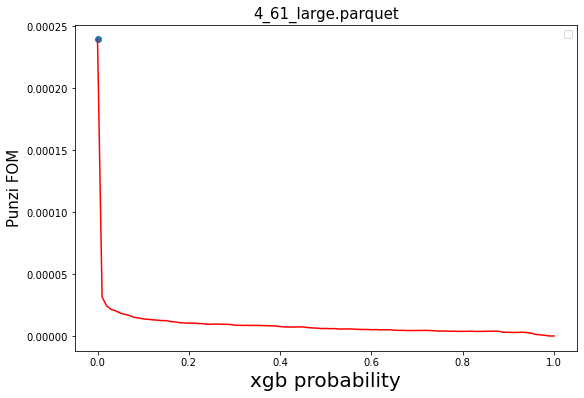

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of sensitivity events: 0.041
xgb value for PFOM_max: 0.0


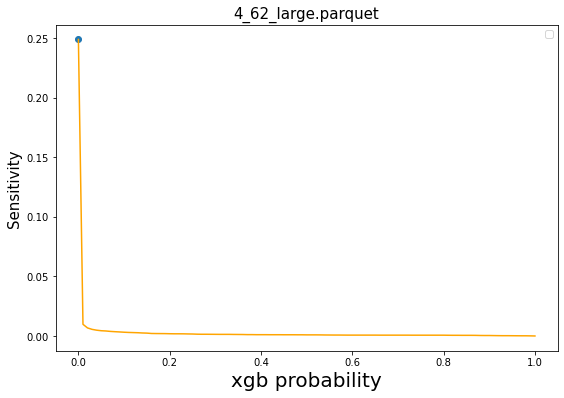

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


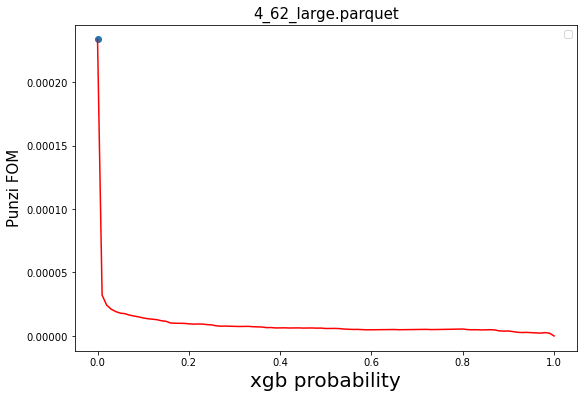

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of sensitivity events: 0.04
xgb value for PFOM_max: 0.0


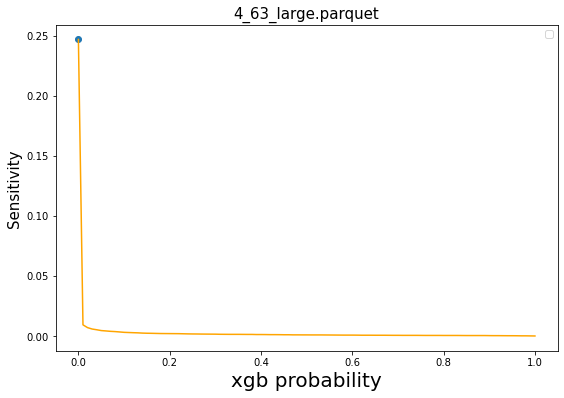

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


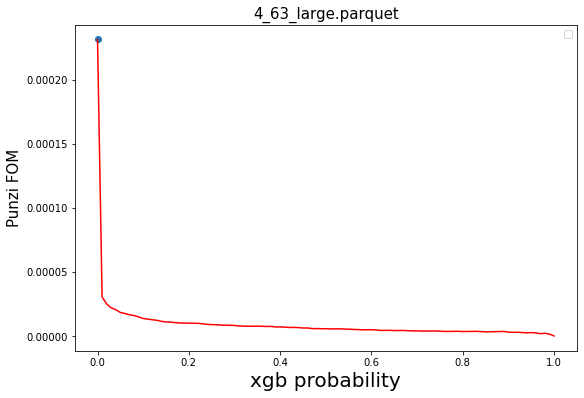

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of sensitivity events: 0.039
xgb value for PFOM_max: 0.0


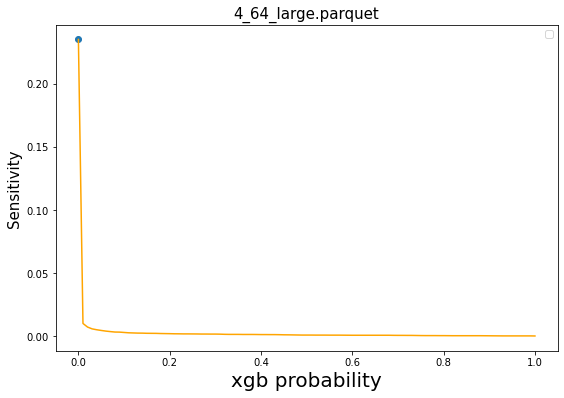

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


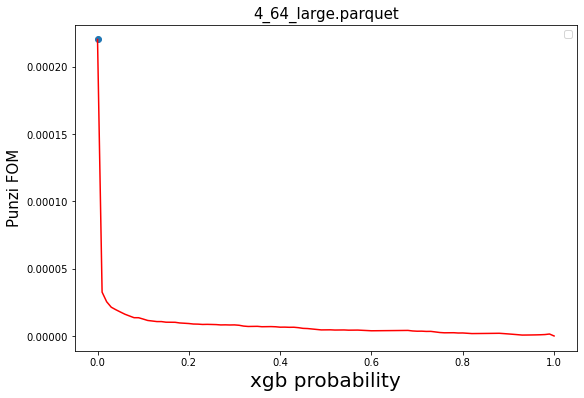

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of sensitivity events: 0.037
xgb value for PFOM_max: 0.0


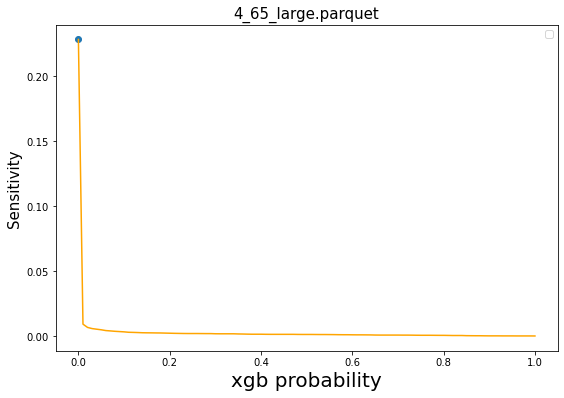

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


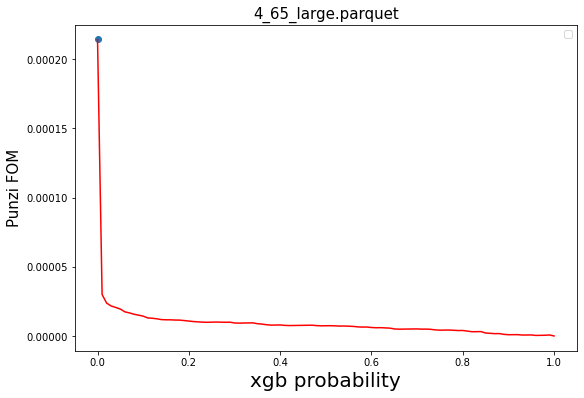

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of sensitivity events: 0.028
xgb value for PFOM_max: 0.0


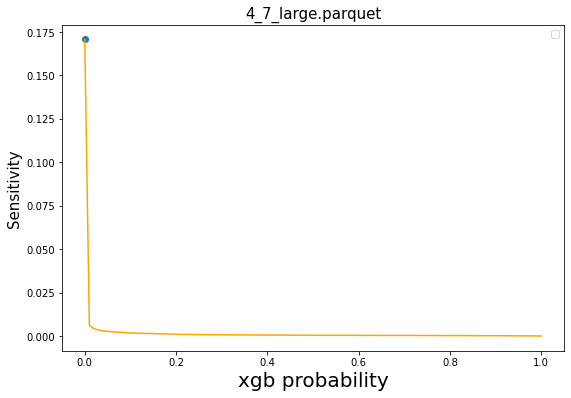

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


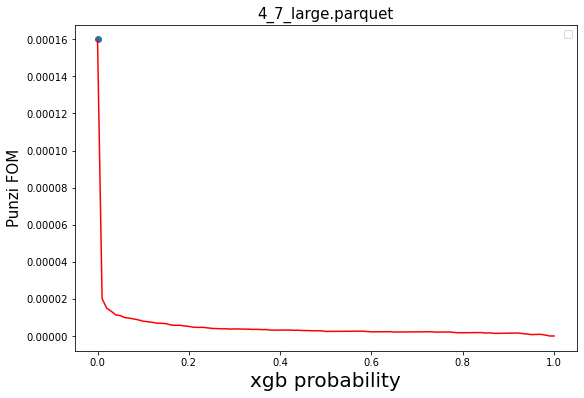

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


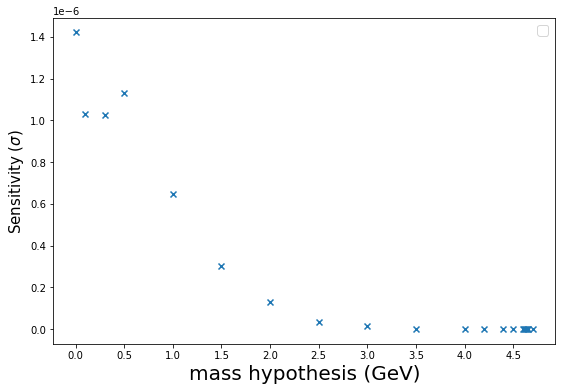

NameError: name 'csv' is not defined

In [1]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import functions as fc
import csv

def sensitivity(pfom_max,B_events):

    bf = 2*0.514*4.6e-6
    sigma=1.11e6 #fb
    l=100/3 #fb⁻¹
    ns=bf*sigma*l*pfom_max
    print(f"Number of sensitivity events: {ns:.2}")
    return ns/B_events


def PFOM(seff,beff,bhist,n):
    return seff/(np.sqrt(beff*sum(bhist))+n/2)





data = ["0_large.parquet","0_1_large.parquet","0_3_large.parquet","0_5_large.parquet","1_large.parquet","1_5_large.parquet","2_large.parquet","2_5_large.parquet","3_large.parquet","3_5_large.parquet",
        "4_0_large.parquet","4_2_large.parquet","4_4_large.parquet","4_5_large.parquet","4_6_large.parquet","4_61_large.parquet","4_62_large.parquet","4_63_large.parquet","4_64_large.parquet","4_65_large.parquet","4_7_large.parquet",]
values = [0.005, 0.1, 0.3, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.2, 4.4, 4.5, 4.6, 4.61, 4.62, 4.63, 4.64, 4.65, 4.7]

S_list = []
maximum = []
eff = []
bkg = []
clf = XGBClassifier()
clf.load_model(f"/ceph/aavocone/PFOM_models/over0_150.txt")

for index,samples in enumerate(data):
    df = pq.read_table(f"/ceph/aavocone/Datasets/{samples}")
    df = df.to_pandas()

    X = df[df.columns[:-1]]    
    y = df["signal"]   
    xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
    xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5)
    yprob = clf.predict_proba(xtrain)[:,1]
    sh,bh,s,b,bin_edges = fc.efficiency(yprob,ytrain)
    pfom = PFOM(s,b,bh,5)
    max_index = np.where(pfom==max(pfom))[0][0]
    b_max = bh >= max_index/100
    b_max = b_max[b_max!=0]
    max_value = pfom[max_index]
    maximum.append(max_value)
    S = sensitivity(pfom[max_index],len(b_max))
    S_list.append(S)
    eff.append(s[max_index])
    bkg.append(len(b_max))
    
    print("xgb value for PFOM_max:",bin_edges[max_index])
    plt.figure(figsize=(9,6))
    plt.scatter(bin_edges[max_index],s[max_index])
    plt.plot(bin_edges, s, color ="orange")
    plt.title(f"{samples}",fontsize=15)
    plt.ylabel("Sensitivity",fontsize=15)
    plt.xlabel("xgb probability", fontsize = 20)
    plt.legend()
    plt.show()

    plt.figure(figsize=(9,6))
    plt.scatter(bin_edges[max_index],pfom[max_index])
    plt.plot(bin_edges, pfom, color ="red")
    plt.title(f"{samples}",fontsize=15)
    plt.ylabel("Punzi FOM",fontsize=15)
    plt.xlabel("xgb probability", fontsize = 20)
    plt.legend()
    plt.show()

plt.figure(figsize=(9,6))
plt.scatter(values, S_list, marker = "x")
plt.ylabel("Sensitivity ($\sigma$)",fontsize=15)
plt.xlabel("mass hypothesis (GeV)", fontsize = 20)
plt.xticks(np.arange(0,4.7,0.5))
plt.legend(fontsize=14)
plt.savefig(f"/work/aavocone/week14/pfom/Sensitivity_0_005_model.pdf", format="pdf",bbox_inches="tight")
plt.show()

with open("0005.csv","w",newline="") as f:
        f.truncate()
        writer = csv.writer(f)
        writer.writerow(S_list)
        writer.writerow(maximum)
        writer.writerow(eff)
        writer.writerow(bkg)


## 3.0

Number of sensitivity events: 0.019
Number of sensitivity events: 0.02
Number of sensitivity events: 0.02
Number of sensitivity events: 0.021
Number of sensitivity events: 0.026
Number of sensitivity events: 0.03
Number of sensitivity events: 0.042
Number of sensitivity events: 0.072
Number of sensitivity events: 0.24
Number of sensitivity events: 0.12
Number of sensitivity events: 0.073
Number of sensitivity events: 0.06
Number of sensitivity events: 0.053
Number of sensitivity events: 0.048
Number of sensitivity events: 0.041
Number of sensitivity events: 0.039
Number of sensitivity events: 0.038
Number of sensitivity events: 0.038
Number of sensitivity events: 0.037
Number of sensitivity events: 0.035


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of sensitivity events: 0.027


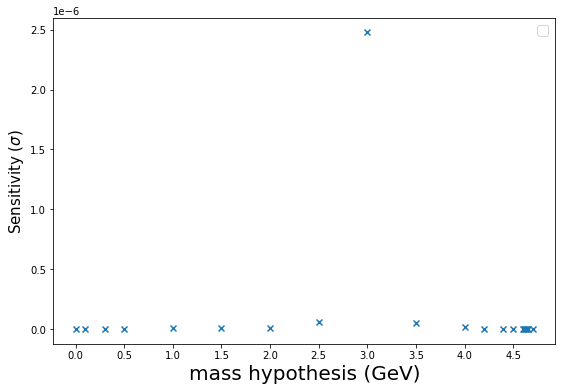

In [ ]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def sensitivity(pfom_max,B_events):

    bf = 2*0.514*4.6e-6
    sigma=1.11e6 #fb
    l=100/3 #fb⁻¹
    ns=bf*sigma*l*pfom_max
    print(f"Number of sensitivity events: {ns:.2}")
    return ns/B_events



def PFOM(seff,beff,bhist,n):
    return seff/(np.sqrt(beff*sum(bhist))+n/2)






data = ["0_large.parquet","0_1_large.parquet","0_3_large.parquet","0_5_large.parquet","1_large.parquet","1_5_large.parquet","2_large.parquet","2_5_large.parquet","3_large.parquet","3_5_large.parquet",
        "4_0_large.parquet","4_2_large.parquet","4_4_large.parquet","4_5_large.parquet","4_6_large.parquet","4_61_large.parquet","4_62_large.parquet","4_63_large.parquet","4_64_large.parquet","4_65_large.parquet","4_7_large.parquet",]
values = [0.005, 0.1, 0.3, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.2, 4.4, 4.5, 4.6, 4.61, 4.62, 4.63, 4.64, 4.65, 4.7]

S_list = []
maximum = []
eff = []
bkg = []
clf = XGBClassifier()
clf.load_model(f"/ceph/aavocone/PFOM_models/3_0_500.txt")

for index,samples in enumerate(data):
    df = pq.read_table(f"/ceph/aavocone/Datasets/{samples}")
    df = df.to_pandas()

    X = df[df.columns[:-1]]    
    y = df["signal"]   
    xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
    xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5)
    yprob = clf.predict_proba(xtrain)[:,1]
    sh,bh,s,b,bin_edges = fc.efficiency(yprob,ytrain)
    pfom = PFOM(s,b,bh,5)
    max_index = np.where(pfom==max(pfom))[0][0]
    b_max = bh >= max_index/100
    b_max = b_max[b_max!=0]
    max_value = pfom[max_index]
    maximum.append(max_value)
    S = sensitivity(pfom[max_index],len(b_max))
    S_list.append(S)
    eff.append(s[max_index])
    bkg.append(len(b_max))

    print("xgb value for PFOM_max:",bin_edges[max_index])
    plt.figure(figsize=(9,6))
    plt.scatter(bin_edges[max_index],s[max_index])
    plt.plot(bin_edges, s, color ="orange")
    plt.title(f"{samples}",fontsize=15)
    plt.ylabel("Sensitivity",fontsize=15)
    plt.xlabel("xgb probability", fontsize = 20)
    plt.legend()
    plt.show()

    plt.figure(figsize=(9,6))
    plt.scatter(bin_edges[max_index],pfom[max_index])
    plt.plot(bin_edges, pfom, color ="red")
    plt.title(f"{samples}",fontsize=15)
    plt.ylabel("Punzi FOM",fontsize=15)
    plt.xlabel("xgb probability", fontsize = 20)
    plt.legend()
    plt.show()

    
plt.figure(figsize=(9,6))
plt.scatter(values, S_list, marker = "x")
plt.ylabel("Sensitivity ($\sigma$)",fontsize=15)
plt.xlabel("mass hypothesis (GeV)", fontsize = 20)
plt.xticks(np.arange(0,4.7,0.5))
plt.legend(fontsize=14)
plt.savefig(f"/work/aavocone/week14/pfom/Sensitivity_3_0_model.pdf", format="pdf",bbox_inches="tight")
plt.show()

with open("3.csv","w",newline="") as f:
        f.truncate()
        writer = csv.writer(f)
        writer.writerow(S_list)
        writer.writerow(maximum)
        writer.writerow(eff)
        writer.writerow(bkg)

## 0.005 + 3.0 + 4.6

Number of sensitivity events: 0.068
Number of sensitivity events: 0.032
Number of sensitivity events: 0.033
Number of sensitivity events: 0.037
Number of sensitivity events: 0.039
Number of sensitivity events: 0.038
Number of sensitivity events: 0.039
Number of sensitivity events: 0.051
Number of sensitivity events: 0.11
Number of sensitivity events: 0.091
Number of sensitivity events: 0.11
Number of sensitivity events: 0.12
Number of sensitivity events: 0.13
Number of sensitivity events: 0.13
Number of sensitivity events: 0.21
Number of sensitivity events: 0.12
Number of sensitivity events: 0.12
Number of sensitivity events: 0.12
Number of sensitivity events: 0.11
Number of sensitivity events: 0.11


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of sensitivity events: 0.083


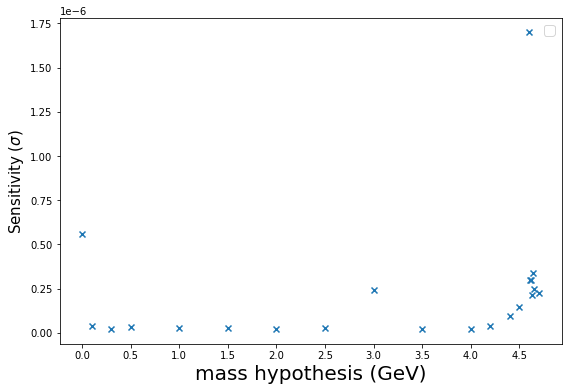

In [2]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import functions as fc
import csv

def sensitivity(pfom_max,B_events):

    bf = 2*0.514*4.6e-6
    sigma=1.11e6 #fb
    l=100/3 #fb⁻¹
    ns=bf*sigma*l*pfom_max
    print(f"Number of sensitivity events: {ns:.2}")
    return ns/B_events



def PFOM(seff,beff,bhist,n):
    return seff/(np.sqrt(beff*sum(bhist))+n/2)





data = ["0_large.parquet","0_1_large.parquet","0_3_large.parquet","0_5_large.parquet","1_large.parquet","1_5_large.parquet","2_large.parquet","2_5_large.parquet","3_large.parquet","3_5_large.parquet",
        "4_0_large.parquet","4_2_large.parquet","4_4_large.parquet","4_5_large.parquet","4_6_large.parquet","4_61_large.parquet","4_62_large.parquet","4_63_large.parquet","4_64_large.parquet","4_65_large.parquet","4_7_large.parquet",]
values = [0.005, 0.1, 0.3, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.2, 4.4, 4.5, 4.6, 4.61, 4.62, 4.63, 4.64, 4.65, 4.7]

S_list = []
maximum = []
eff = []
bkg = []
clf = XGBClassifier()
clf.load_model(f"/ceph/aavocone/models/all_1000.txt")

for index,samples in enumerate(data):
    df = pq.read_table(f"/ceph/aavocone/Datasets/{samples}")
    df = df.to_pandas()

    X = df[df.columns[:-1]]    
    y = df["signal"]   
    xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
    xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5)
    yprob = clf.predict_proba(xtrain)[:,1]
    sh,bh,s,b,bin_edges = fc.efficiency(yprob,ytrain)
    pfom = PFOM(s,b,bh,5)
    max_index = np.where(pfom==max(pfom))[0][0]
    b_max = bh >= max_index/100
    b_max = b_max[b_max!=0]
    max_value = pfom[max_index]
    maximum.append(max_value)
    S = sensitivity(pfom[max_index],len(b_max))
    S_list.append(S)
    eff.append(s[max_index])
    bkg.append(len(b_max))


plt.figure(figsize=(9,6))
plt.scatter(values, S_list, marker = "x")
plt.ylabel("Sensitivity ($\sigma$)",fontsize=15)
plt.xlabel("mass hypothesis (GeV)", fontsize = 20)
plt.xticks(np.arange(0,4.7,0.5))
plt.legend(fontsize=14)
#lt.savefig(f"/work/aavocone/week16/pfom/Sensitivity_allmodel.pdf", format="pdf",bbox_inches="tight")
plt.show()

with open("all_1000.csv","w",newline="") as f:
        f.truncate()
        writer = csv.writer(f)
        writer.writerow(S_list)
        writer.writerow(maximum)
        writer.writerow(eff)
        writer.writerow(bkg)

In [3]:
import csv


with open("all_600.csv","w",newline="") as f:
        f.truncate()
        writer = csv.writer(f)
        writer.writerow(S_list)
        writer.writerow(maximum)
        writer.writerow(eff)
        writer.writerow(bkg)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


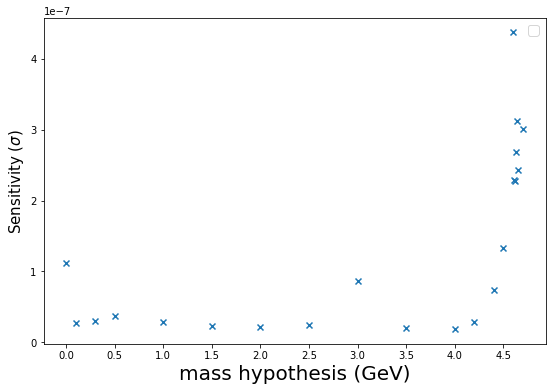

In [4]:
plt.figure(figsize=(9,6))
plt.scatter(values, S_list, marker = "x")
plt.ylabel("Sensitivity ($\sigma$)",fontsize=15)
plt.xlabel("mass hypothesis (GeV)", fontsize = 20)
plt.xticks(np.arange(0,4.7,0.5))
plt.legend(fontsize=14)
plt.savefig(f"/work/aavocone/week16//Sensitivity_all600.pdf", format="pdf",bbox_inches="tight")
plt.show()


# Plot sensitivity and $PFOM_{max}$

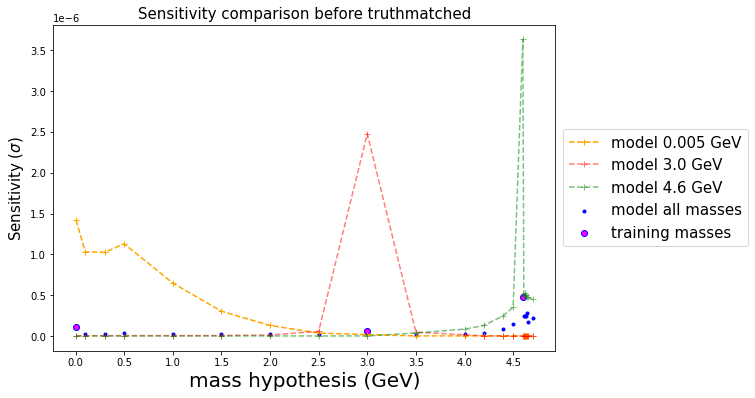

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

values = [0.005, 0.1, 0.3, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.2, 4.4, 4.5, 4.6, 4.61, 4.62, 4.63, 4.64, 4.65, 4.7]


df0 = pd.read_csv("0005.csv", header=None)
df3 = pd.read_csv("3.csv", header=None)
df4 = pd.read_csv("46.csv", header=None)
df = pd.read_csv("all.csv", header=None)




plt.figure(figsize=(9,6))
ax = plt.subplot(111)

ax.plot(values, df0.iloc[0], marker = "+",label = "model 0.005 GeV", color = "orange", linestyle = "--")
ax.plot(values, df3.iloc[0], marker = "+", label = "model 3.0 GeV",  alpha = 0.5, color = "r", linestyle = "--")
ax.plot(values, df4.iloc[0], marker = "+", label = "model 4.6 GeV", alpha = 0.5, color = "g", linestyle = "--")
ax.scatter(values[1:8], df.iloc[0][1:8], label = "model all masses", color="blue", marker=".")
ax.scatter(values[9:14], df.iloc[0][9:14], color="blue", marker=".")
ax.scatter(values[15:], df.iloc[0][15:], color="blue", marker=".")
ax.scatter(values[0], df.iloc[0][0], label = "training masses", facecolor="fuchsia", marker="o", edgecolors="blue")
ax.scatter(values[8], df.iloc[0][8], facecolor="fuchsia", marker="o", edgecolors="blue")
ax.scatter(values[14], df.iloc[0][14], facecolor="fuchsia", marker="o", edgecolors="blue")
plt.ylabel("Sensitivity ($\sigma$) ",fontsize=15)
plt.xlabel("mass hypothesis (GeV)", fontsize = 20)
plt.xticks(np.arange(0,4.7,0.5))

plt.title("Sensitivity comparison before truthmatched",fontsize=15)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.savefig(f"/work/aavocone/week15/pfom/Sensitivity_comparison.pdf", format="pdf",bbox_inches="tight")
plt.show()

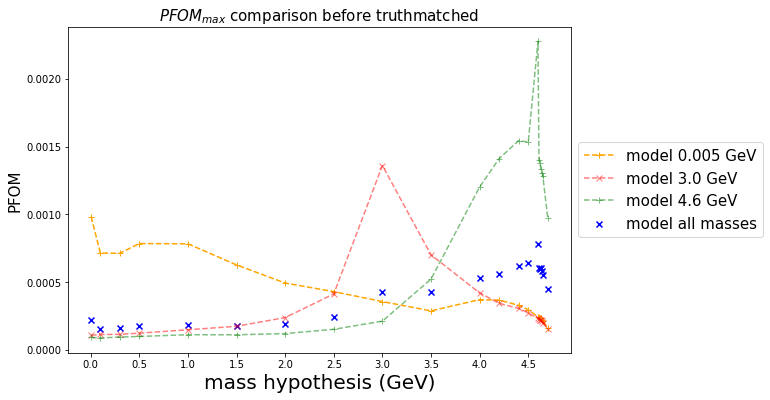

In [23]:
plt.figure(figsize=(9,6))
ax = plt.subplot(111)

ax.plot(values, df0.iloc[1], marker = "+",label = "model 0.005 GeV", color = "orange", linestyle = "--")
ax.plot(values, df3.iloc[1], marker = "x", label = "model 3.0 GeV",  alpha = 0.5, color = "r", linestyle = "--")
ax.plot(values, df4.iloc[1], marker = "+", label = "model 4.6 GeV", alpha = 0.5, color = "g", linestyle = "--")
ax.scatter(values, df.iloc[1], label = "model all masses", color="b", marker="x")
plt.ylabel("PFOM",fontsize=15)
plt.xlabel("mass hypothesis (GeV)", fontsize = 20)
plt.xticks(np.arange(0,4.7,0.5))
plt.title("$PFOM_{max}$ comparison before truthmatched",fontsize=15)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)

plt.savefig(f"/work/aavocone/week15/pfom/PFOM_comparison.pdf", format="pdf",bbox_inches="tight")
plt.show()

# Plot signal efficiency and number of background at/after PFOM_max

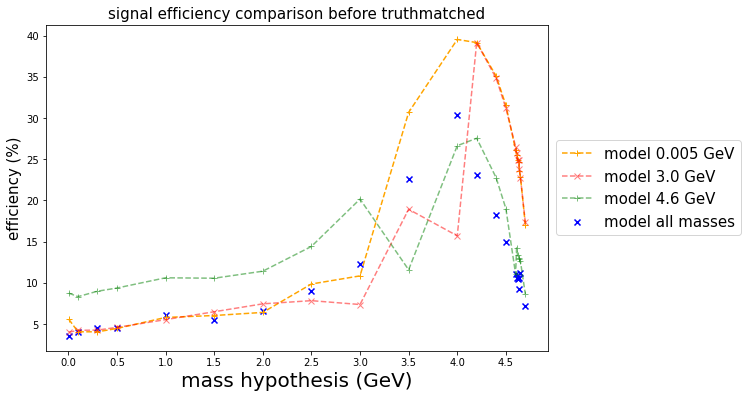

In [24]:
plt.figure(figsize=(9,6))
ax = plt.subplot(111)

ax.plot(values, df0.iloc[2]*100, marker = "+",label = "model 0.005 GeV", color = "orange", linestyle = "--")
ax.plot(values, df3.iloc[2]*100, marker = "x", label = "model 3.0 GeV",  alpha = 0.5, color = "r", linestyle = "--")
ax.plot(values, df4.iloc[2]*100, marker = "+", label = "model 4.6 GeV", alpha = 0.5, color = "g", linestyle = "--")
ax.scatter(values, df.iloc[2]*100, label = "model all masses", color="b", marker="x")
plt.ylabel("efficiency (%)",fontsize=15)
plt.xlabel("mass hypothesis (GeV)", fontsize = 20)
plt.xticks(np.arange(0,4.7,0.5))

plt.title("signal efficiency comparison before truthmatched",fontsize=15)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)

plt.savefig(f"/work/aavocone/week15/pfom/efficicnecy_comparison.pdf", format="pdf",bbox_inches="tight")
plt.show()

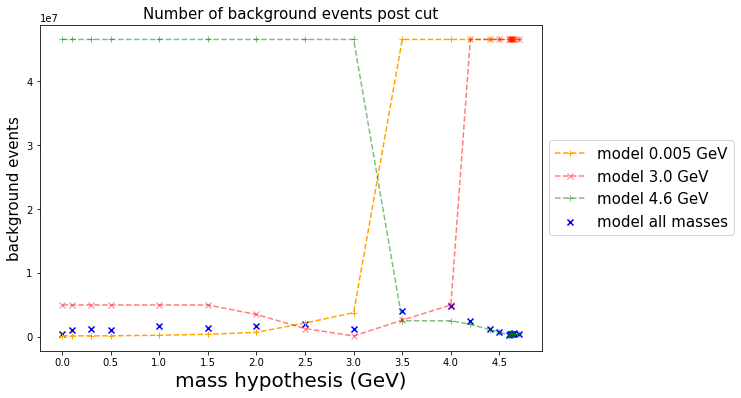

In [25]:
plt.figure(figsize=(9,6))
ax = plt.subplot(111)

ax.plot(values, df0.iloc[3], marker = "+",label = "model 0.005 GeV", color = "orange", linestyle = "--")
ax.plot(values, df3.iloc[3], marker = "x", label = "model 3.0 GeV",  alpha = 0.5, color = "r", linestyle = "--")
ax.plot(values, df4.iloc[3], marker = "+", label = "model 4.6 GeV", alpha = 0.5, color = "g", linestyle = "--")
ax.scatter(values, df.iloc[3], label = "model all masses", color="b", marker="x")
plt.ylabel("background events",fontsize=15)
plt.xlabel("mass hypothesis (GeV)", fontsize = 20)
plt.xticks(np.arange(0,4.7,0.5))

plt.title("Number of background events post cut",fontsize=15)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)

plt.savefig(f"/work/aavocone/week14/pfom/background_comparison.pdf", format="pdf",bbox_inches="tight")
plt.show()

In [10]:
# selection efficiency before truth bevor cut

# plot all exept background
# check sensitivity for 4.6 GeV, why difference so high compared to allmodel

# for thesis: calculate the BF for signal to happen with given model

# Thesis deadline: 2 week for intro + simulation + xgboost




#intro
#   exp
#   theory
#simulation samples
#   variables
#gboost
#   variables
#   training aproach
#results/analysis
#   PFOM
#   sig eff
#   sensitivity
#conclusion
#outlook